(0.4590204159418742, 0.875)
(0.5217100779215494, 0.8020833333333334)
(0.39251017570495605, 0.84375)
(0.4010603427886963, 0.8958333333333334)
(0.541291077931722, 0.8020833333333334)
(0.3205415407816569, 0.90625)
(0.2720850904782613, 0.9375)
(0.2750040690104167, 0.8854166666666666)
(0.3412519296010335, 0.875)
(0.27256133159001666, 0.8958333333333334)


/home/lindenbaum/Documents/Python/DeepLearning/DeepLearning/st_train.py:108: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, axes = plt.subplots(1,n,figsize= (8,8))


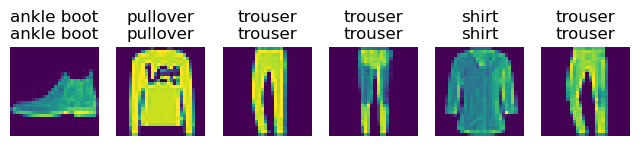

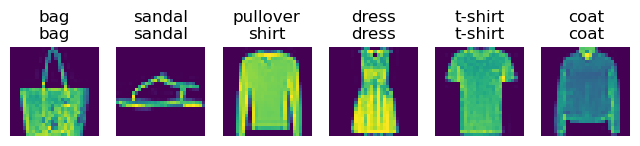

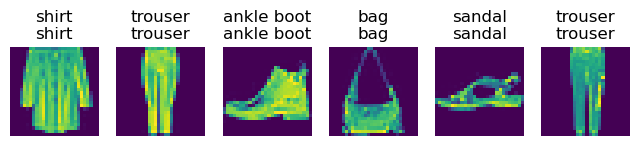

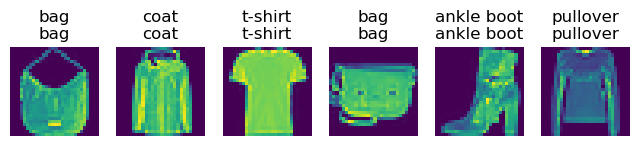

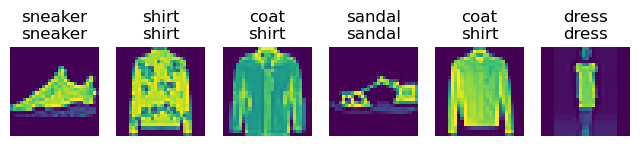

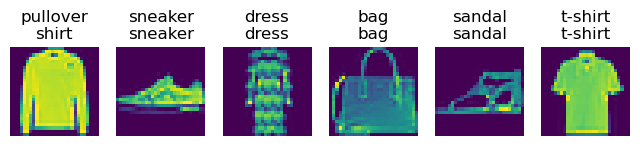

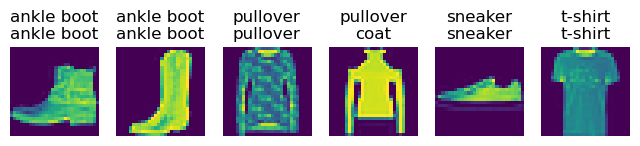

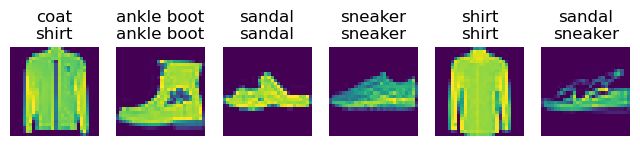

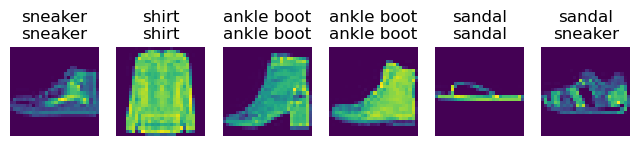

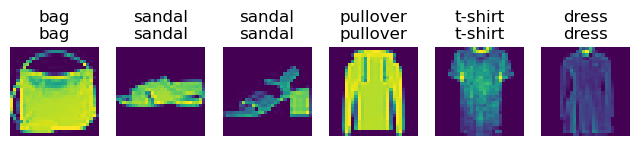

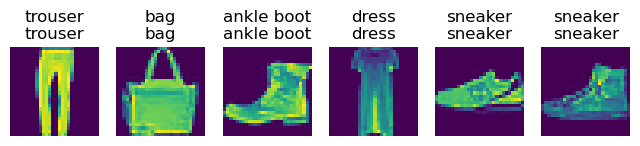

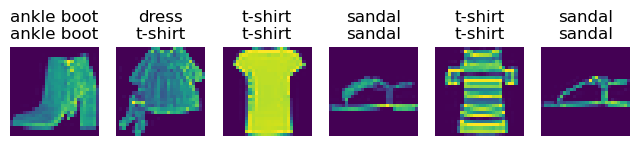

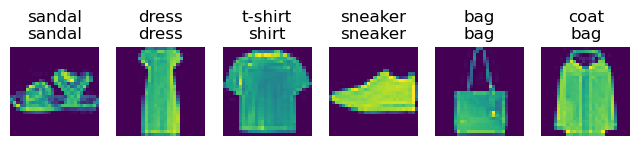

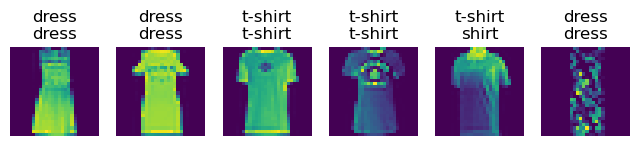

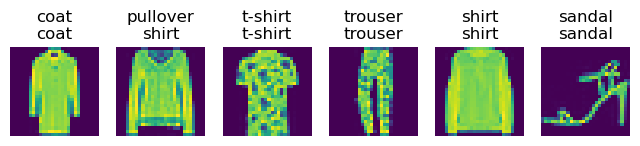

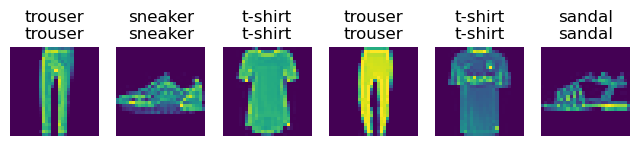

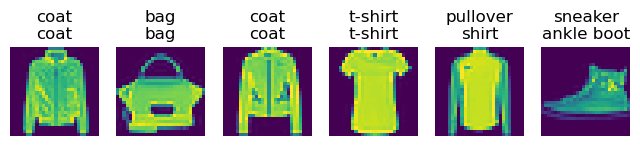

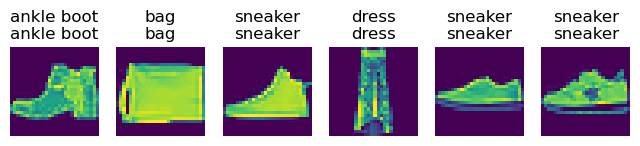

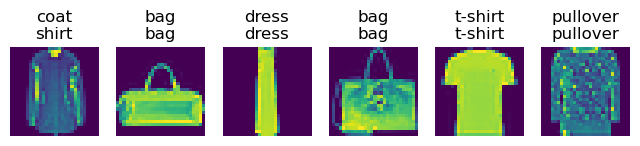

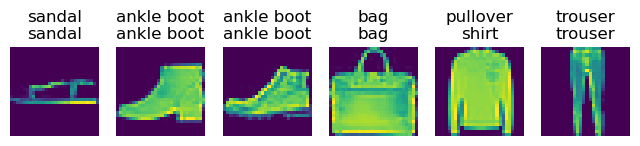

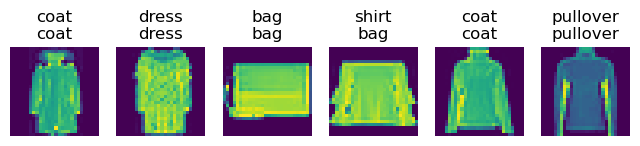

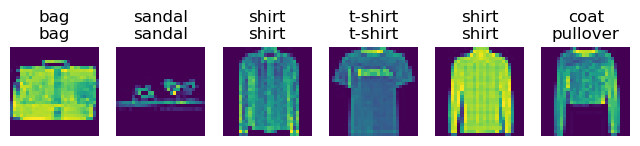

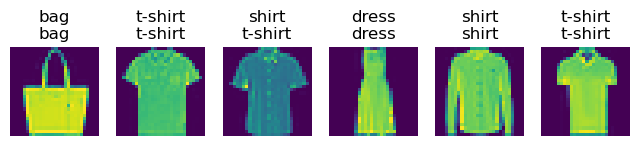

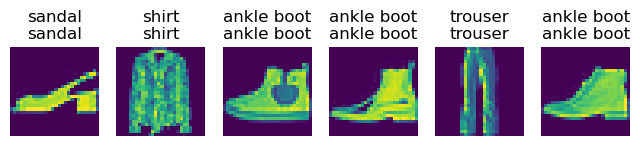

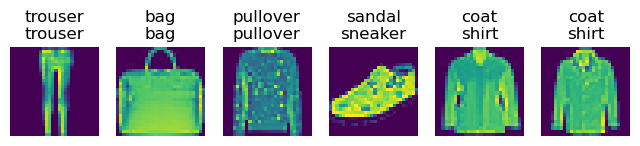

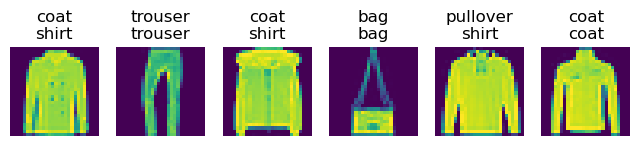

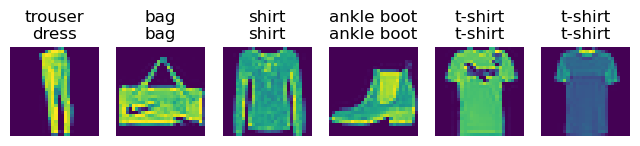

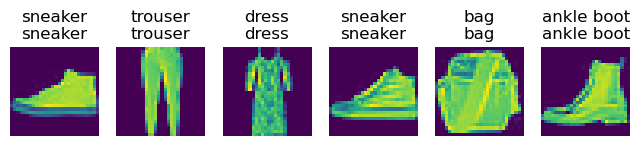

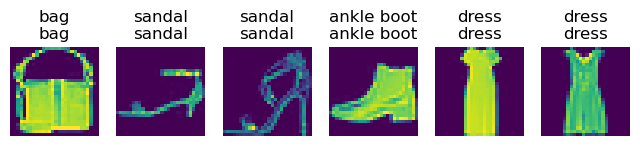

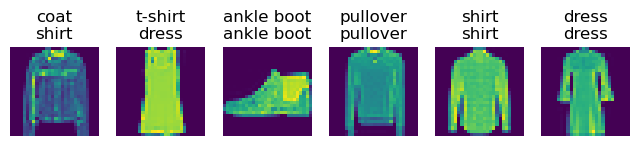

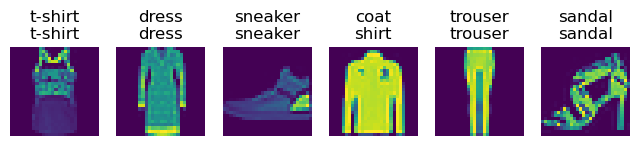

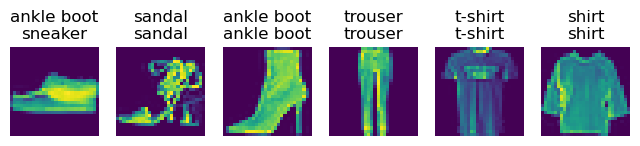

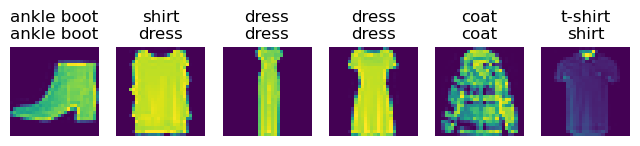

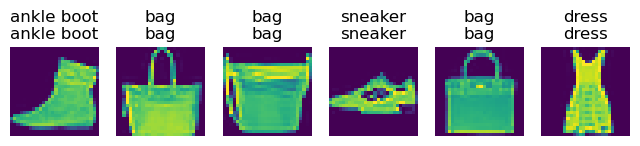

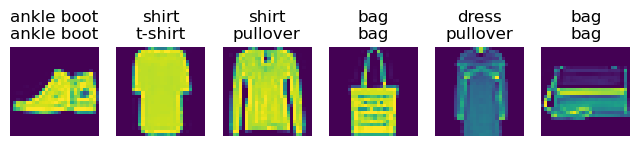

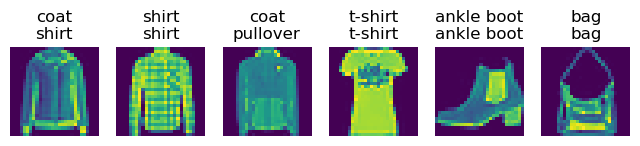

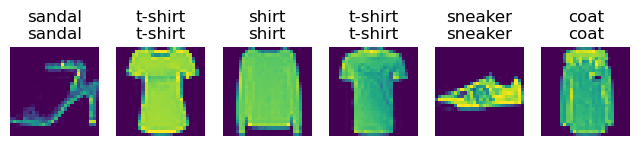

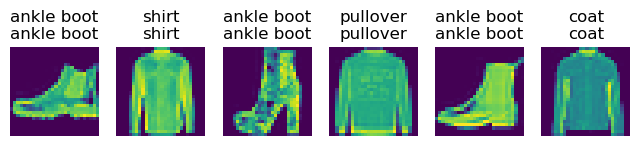

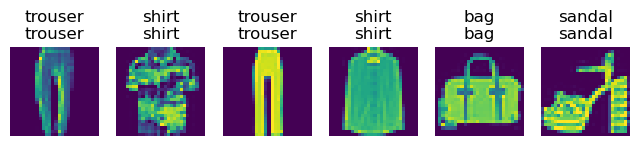

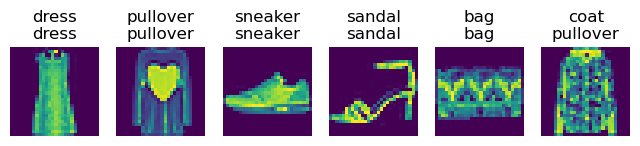

In [1]:
from st_train import *
import sys
import os
import torch
import torchvision
import torch.nn as nn
from torch.utils import data
import matplotlib.pyplot as plt
from torchvision import transforms
num_inputs , num_outputs , num_hiddens= 784, 10 , 256 #定义输入特征数量 输出类别数量 隐藏层中的隐藏单元数
num_epochs = 10
learning_rate = 0.1
batch_size = 256
train_set, test_set =(
            data.DataLoader(torchvision.datasets.FashionMNIST(root='./data', train=True,
                                                            transform=transforms.ToTensor(),
                                                            download=True),
                            num_workers=16, batch_size=batch_size, shuffle=True),
            data.DataLoader(torchvision.datasets.FashionMNIST(root='./data', train=False,
                                                            transform=transforms.ToTensor(),
                                                            download=True),
                            num_workers=16, batch_size=batch_size, shuffle=False))
"""
X:矩阵样本 n(样本个数)*d(每个样本的特征数)
W1:第一层权重 d*h(隐藏层隐藏单元数)
X*W1 --> H1 n*h
W2:第二层权重 h*q(输出数量)
H1*W2 --> H2 n*q
"""
def ReLU(X): # 线性规范单元 是一种激活函数
    temp = torch.zeros_like(X)
    return torch.max(X,temp)
def net(X):
    X = X.reshape((-1,num_inputs)) # 二维图像转换为一维向量
    H = ReLU(X@W1 + b1) # @是矩阵乘法 H是隐藏层 这里表示经过一层隐藏层
    return H@W2 + b2 # 从隐藏层到输出层
batch_size = 256
# 隐藏层为一层
W1 = nn.Parameter(torch.randn(num_inputs,num_hiddens,requires_grad=True)* 0.01) # nn.Parameter是一个特殊张量, 在被指派为nn.Module时自动成为该模型的一个参数
b1 = nn.Parameter(torch.zeros(num_hiddens,requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens,num_outputs,requires_grad=True)* 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs,requires_grad=True))
params = [W1,b1,W2,b2] # 参数列表
loss = nn.CrossEntropyLoss(reduction='none') # 使用交叉熵损失作为损失函数
updater = torch.optim.SGD(params, learning_rate, 0.7)
# torch.optim.SGD(parameters, lr, momentum) 是内置的随机梯度下降优化器 传入参数列表 学习率 momentum帮助加速优化过程 取0.5-0.9
std_train(net, train_set,test_set, loss, num_epochs,updater)
std_prediction(net, test_set, 6)